# Inspecting Movie Data 

Three movie data files are stored in an s3 bucket. These three data files will be loaded into dataframes, inspected and transformed for the machine learning training process.

## Loading title.akas.tsv file into a DataFrame for inspection and transformation

In [302]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#reading title.Akas.tsv file from s3 bucket and loading data into dataframe
titleAkas_df = pd.read_csv("s3://mlmovieinfofiles/title.akas.tsv", sep='\t', dtype={'region':'category','language':'category','types':'category','attributes':'category','ordering':'uint8','isOriginalTitle' : 'object'})

In [303]:
titleAkas_df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [304]:
#checking data types
titleAkas_df.dtypes

titleId              object
ordering              uint8
title                object
region             category
language           category
types              category
attributes         category
isOriginalTitle      object
dtype: object

In [305]:
#checking for duplicate rows in titleAkas_df and dropping if any exist
duplicate_Akasrows_df = titleAkas_df[titleAkas_df.duplicated()]
print("number of duplicate rows: ", duplicate_Akasrows_df.shape)

#titleAkas_df = titleAkas_df.drop_duplicates()

number of duplicate rows:  (0, 8)


In [306]:
titleAkas_df.shape

(23854591, 8)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

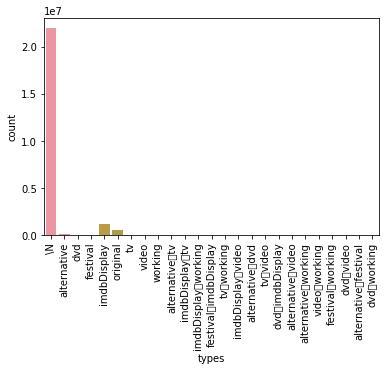

In [307]:
sns.countplot(x='types', data=titleAkas_df)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

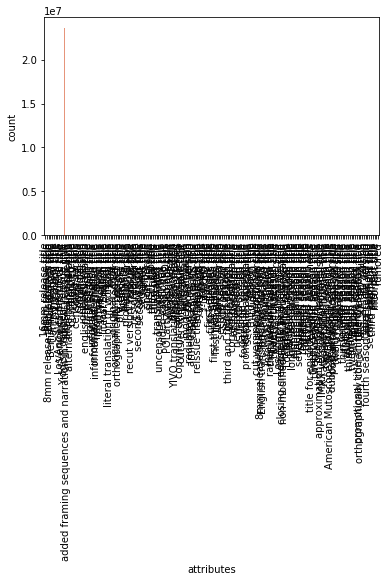

In [308]:
sns.countplot(x='attributes', data=titleAkas_df)
plt.xticks(rotation=90)

In [309]:
titleAkas_df.title.str.count("\\\\N").sum()

2629.0

In [310]:
titleAkas_df.region.str.count("\\\\N").sum()

579851.0

In [311]:
titleAkas_df.language.str.count("\\\\N").sum()

4111171

In [312]:
titleAkas_df.types.str.count("\\\\N").sum()

21999072

In [313]:
titleAkas_df.attributes.str.count("\\\\N").sum()

23645673

In [314]:
titleAkas_df.isOriginalTitle.str.count("\\\\N").sum()

2189

In [315]:
#dropping irrelevant columns 
titleAkas_df = titleAkas_df.drop(['types','attributes','language'],axis=1)
titleAkas_df.head()

,titleId,ordering,title,region,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,0
1,tt0000001,2,Carmencita,DE,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,0
3,tt0000001,4,Καρμενσίτα,GR,0
4,tt0000001,5,Карменсита,RU,0


In [316]:
#Checking how many unique values are in region column
#titleAkas_df.region.unique()

In [317]:
#Removing rows that have region value "\\\\N" and isOriginalTitle value "0"
#for ind in titleAkas_df.index:
#    if titleAkas_df.region.str == "\\\\N":  
#        if titleAkas_df.isOriginalTitle.str == '0': 
#            titleAkas_df.drop(titleAkas_df.index[ind])
#            break
#        else:
            
#    else:
        

In [318]:
#titleAkas_df.shape

In [319]:
#Assigning rows with isOriginalTitle value "1" to a new dataframe
#isOriginal_df = titleAkas_df[titleAkas_df.isOriginalTitle=='1'] 
#isOriginal_df

In [320]:
#isOriginal_df.shape

In [321]:
#isOriginal_df.region.str.count("\\\\N").sum()

## Loading title.basics.tsv file into a DataFrame for inspection and transformation

In [322]:
#read title.basics.tsv file from s3 bucket and loading data into dataframe
titleBasics_df = pd.read_csv("s3://mlmovieinfofiles/title.basics.tsv", sep='\t', dtype={'isAdult':'uint8', 'startYear':'category', 'endYear':'category','genres':'object'})

In [323]:
titleBasics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [324]:
#checking data types
titleBasics_df.dtypes

tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult              uint8
startYear         category
endYear           category
runtimeMinutes      object
genres              object
dtype: object

In [325]:
#renaming confusing column names
titleBasics_df = titleBasics_df.rename(columns={'tconst': 'titleId'})

In [326]:
#check for duplicate rows in titleBasics_df and dropping if any exist
duplicate_Basicsrows_df = titleBasics_df[titleBasics_df.duplicated()]
print("number of duplicate rows: ", duplicate_Basicsrows_df.shape)

#titleBasics_df = titleBasics_df.drop_duplicates()

number of duplicate rows:  (0, 9)


In [327]:
titleBasics_df.shape

(7270373, 9)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

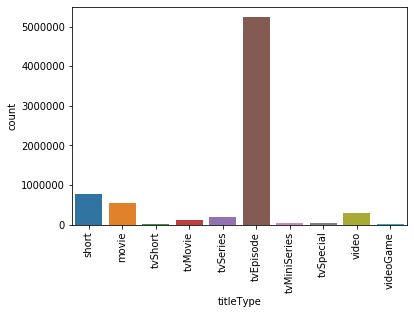

In [328]:
sns.countplot(x='titleType', data=titleBasics_df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94]),
 <a list of 95 Text xticklabel objects>)

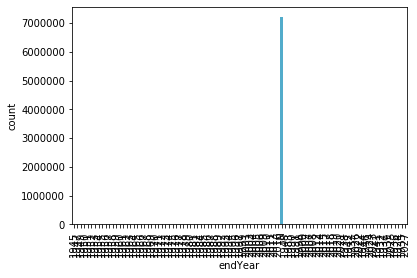

In [329]:
sns.countplot(x='endYear', data=titleBasics_df)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

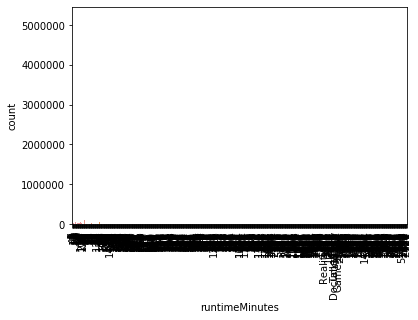

In [330]:
sns.countplot(x='runtimeMinutes', data=titleBasics_df)
plt.xticks(rotation=90)

In [331]:
titleBasics_df.startYear.str.count("\\\\N").sum()

651099

In [332]:
titleBasics_df.endYear.str.count("\\\\N").sum()

7203612

In [333]:
titleBasics_df.runtimeMinutes.str.count("\\\\N").sum()

5204153

In [334]:
titleBasics_df.genres.str.count("\\\\N").sum()

569555.0

In [335]:
#dropping irrelevant columns 
titleBasics_df = titleBasics_df.drop(['endYear','runtimeMinutes'],axis=1)
titleBasics_df.head()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,"Comedy,Short"


## Loading title.ratings.tsv file into a DataFrame for inspection and transformation

In [336]:
#read title.ratings.tsv file from s3 bucket and loading data into dataframe
titleRatings_df = pd.read_csv("s3://mlmovieinfofiles/title.ratings.tsv", sep='\t')

In [337]:
titleRatings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1652
1,tt0000002,6.1,199
2,tt0000003,6.5,1363
3,tt0000004,6.2,121
4,tt0000005,6.2,2148


In [338]:
#checking data types
titleRatings_df.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [339]:
#renaming confusing column names
titleRatings_df = titleRatings_df.rename(columns={'tconst': 'titleId'})

In [340]:
#check for duplicate rows in titleRatings_df and dropping if any exist
duplicate_Ratingsrows_df = titleRatings_df[titleRatings_df.duplicated()]
print("number of duplicate rows: ", duplicate_Ratingsrows_df.shape)

#titleRatings_df = titleRatings_df.drop_duplicates()

number of duplicate rows:  (0, 3)


In [341]:
titleRatings_df.shape

(1084871, 3)

# Visualizing Movie Data

### Finding Outliers in titleRatings_df Dataframe

In [342]:
#import seaborn as sns
#sns.boxplot(x=titleRatings_df['averageRating'])

In [343]:
#import seaborn as sns
#sns.boxplot(x=titleRatings_df['numVotes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e7c4d6358>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8f25f61e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8db84e0908>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8f25f7d710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f25f8bcc0>,
 'means': []}

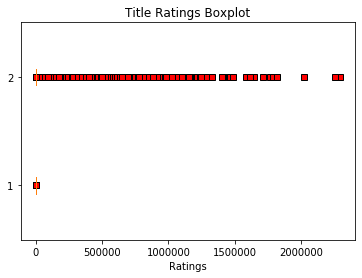

In [344]:
#Displaying a boxplot for titleRatings_df
import matplotlib.pyplot as plt

ratingsdata = (titleRatings_df.averageRating,titleRatings_df.numVotes)

red_square = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots()
ax.set_title('Title Ratings Boxplot')
ax.set_xlabel('Ratings')

ax.boxplot(ratingsdata, vert=False, flierprops=red_square)

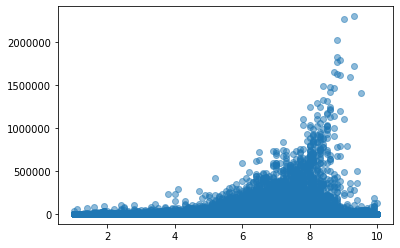

In [345]:
#Displaying a scatterplot for titleRatings_df
x = titleRatings_df.averageRating
y = titleRatings_df.numVotes


plt.scatter(x, y, alpha=0.5)
plt.show()

In [346]:
#fig, ax = plt.subplots(figsize=(16,8))
#ax.scatter(titleRatings_df['averageRating'], titleRatings_df['numVotes'])
#ax.set_xlabel('Ratings')
#ax.set_ylabel('Number of Votes')
#plt.show()

### Using the IQR score technique to detect and remove outliers

In [347]:
Q1 = titleRatings_df.quantile(0.25)
Q3 = titleRatings_df.quantile(0.75)
IQR = (Q3 - Q1)
print(IQR)

averageRating     1.7
numVotes         70.0
dtype: float64


In [348]:
#Removing outliers
titleRatings_df = titleRatings_df[~((titleRatings_df < (Q1 - 1.5 * IQR)) |(titleRatings_df > (Q3 + 1.5 * IQR))).any(axis=1)]
titleRatings_df.shape

(892764, 3)

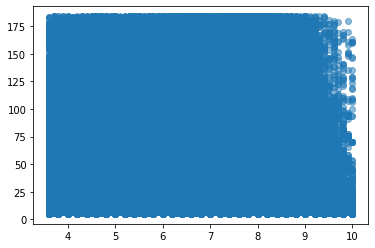

In [349]:
#Displaying a scatterplot after outliers have been removed
x = titleRatings_df.averageRating
y = titleRatings_df.numVotes


plt.scatter(x, y, alpha=0.5)
plt.show()

# Joining titleAkas_df and titleBasics_df Dataframes to titleRatings_df Dataframe

In [350]:
from pandas import DataFrame

#first joining titleBasics_df to titleRatings_df
ratingsBasics_df = pd.merge(titleRatings_df, titleBasics_df,on='titleId')

ratingsBasics_df.head()

,titleId,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,genres
0,tt0000004,6.2,121,short,Un bon bock,Un bon bock,0,1892,"Animation,Short"
1,tt0000006,5.3,115,short,Chinese Opium Den,Chinese Opium Den,0,1894,Short
2,tt0000009,5.9,156,movie,Miss Jerry,Miss Jerry,0,1894,Romance
3,tt0000019,5.3,20,short,The Clown Barber,The Clown Barber,0,1898,"Comedy,Short"
4,tt0000024,4.5,54,short,Opening of the Kiel Canal,Opening of the Kiel Canal,0,1895,"News,Short"


In [351]:
ratingsBasics_df.shape

(892764, 9)

In [352]:
#Assigning rows with isOriginalTitle value "1" to a new dataframe
titleAkasOriginals_df = titleAkas_df[titleAkas_df.isOriginalTitle=='1']
titleAkasOriginals_df.head()

,titleId,ordering,title,region,isOriginalTitle
6,tt0000001,7,Carmencita,\N,1
8,tt0000002,1,Le clown et ses chiens,\N,1
21,tt0000003,6,Pauvre Pierrot,\N,1
25,tt0000004,1,Un bon bock,\N,1
33,tt0000005,10,Blacksmith Scene,\N,1


In [353]:
ratingsBasicsAkas_df = pd.merge(ratingsBasics_df, titleAkasOriginals_df,on='titleId')
ratingsBasicsAkas_df.head()

,titleId,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,genres,ordering,title,region,isOriginalTitle
0,tt0000004,6.2,121,short,Un bon bock,Un bon bock,0,1892,"Animation,Short",1,Un bon bock,\N,1
1,tt0000006,5.3,115,short,Chinese Opium Den,Chinese Opium Den,0,1894,Short,5,Chinese Opium Den,\N,1
2,tt0000009,5.9,156,movie,Miss Jerry,Miss Jerry,0,1894,Romance,1,Miss Jerry,\N,1
3,tt0000024,4.5,54,short,Opening of the Kiel Canal,Opening of the Kiel Canal,0,1895,"News,Short",1,Opening of the Kiel Canal,\N,1
4,tt0000034,5.3,135,short,Arrivée d'un train gare de Vincennes,Arrivée d'un train gare de Vincennes,0,1896,"Documentary,Short",1,Arrivée d'un train gare de Vincennes,\N,1


In [354]:
ratingsBasicsAkas_df.shape

(205721, 13)

In [355]:
ratingsBasicsAkas_df.dtypes

titleId              object
averageRating       float64
numVotes              int64
titleType            object
primaryTitle         object
originalTitle        object
isAdult               uint8
startYear          category
genres               object
ordering              uint8
title                object
region             category
isOriginalTitle      object
dtype: object

In [356]:
ratingsBasicsAkas_df.isnull().sum()

titleId            0
averageRating      0
numVotes           0
titleType          0
primaryTitle       0
originalTitle      0
isAdult            0
startYear          0
genres             0
ordering           0
title              0
region             0
isOriginalTitle    0
dtype: int64

In [357]:
#ratingsBasicsAkas_df = ratingsBasicsAkas_df.drop(ratingsBasicsAkas_df.loc[ratingsBasicsAkas_df['region'].isnull()].index)

In [358]:
ratingsBasicsAkas_df.shape

(205721, 13)

In [359]:
#check for duplicate rows in titleRatings_df and dropping if any exist
duplicate_joinedDatarows_df = ratingsBasicsAkas_df[ratingsBasicsAkas_df.duplicated()]
print("number of duplicate rows: ", duplicate_joinedDatarows_df.shape)

#ratingsBasicsAkas_df = ratingsBasicsAkas_df.drop_duplicates()

number of duplicate rows:  (0, 13)


In [360]:
#Feature engineering for titleType column
ratingsBasicsAkas_df['titleType'] = np.where(ratingsBasicsAkas_df['titleType']=='tvShort', 'short', ratingsBasicsAkas_df['titleType'])

ratingsBasicsAkas_df['titleType'] = np.where(ratingsBasicsAkas_df['titleType']=='tvMovie', 'movie', ratingsBasicsAkas_df['titleType'])

ratingsBasicsAkas_df['titleType'] = np.where(ratingsBasicsAkas_df['titleType']=='tvMiniSeries', 'tvSeries', ratingsBasicsAkas_df['titleType'])

ratingsBasicsAkas_df['titleType'] = np.where(ratingsBasicsAkas_df['titleType']=='videoGame', 'video', ratingsBasicsAkas_df['titleType'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

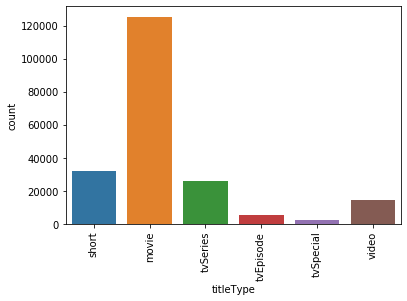

In [361]:
sns.countplot(x='titleType', data=ratingsBasicsAkas_df)
plt.xticks(rotation=90)

In [362]:
ratingsBasicsAkas_df.startYear.str.count("\\\\N").sum()

24

In [363]:
ratingsBasicsAkas_df.genres.str.count("\\\\N").sum()

6939

In [364]:
ratingsBasicsAkas_df.region.str.count("\\\\N").sum()

205716

In [365]:
#ratingsBasicsAkas_df.title.str.count("\\\\N").sum()

In [366]:
#ratingsBasicsAkas_df.isOriginalTitle.str.count("\\\\N").sum()

In [367]:
#dropping irrelevant columns 
ratingsBasicsAkas_df = ratingsBasicsAkas_df.drop(['ordering','title','region','isOriginalTitle'],axis=1)
ratingsBasicsAkas_df.head()

,titleId,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,genres
0,tt0000004,6.2,121,short,Un bon bock,Un bon bock,0,1892,"Animation,Short"
1,tt0000006,5.3,115,short,Chinese Opium Den,Chinese Opium Den,0,1894,Short
2,tt0000009,5.9,156,movie,Miss Jerry,Miss Jerry,0,1894,Romance
3,tt0000024,4.5,54,short,Opening of the Kiel Canal,Opening of the Kiel Canal,0,1895,"News,Short"
4,tt0000034,5.3,135,short,Arrivée d'un train gare de Vincennes,Arrivée d'un train gare de Vincennes,0,1896,"Documentary,Short"


In [368]:
ratingsBasicsAkas_df = ratingsBasicsAkas_df[ratingsBasicsAkas_df.genres != '\\N']

In [369]:
ratingsBasicsAkas_df.shape

(198782, 9)

In [370]:
ratingsBasicsAkas_df.genres.str.count("\\\\N").sum()

0

In [371]:
ratingsBasicsAkas_df.startYear.str.count("\\\\N").sum()

24

In [372]:
ratingsBasicsAkas_df = ratingsBasicsAkas_df[ratingsBasicsAkas_df.startYear != '\\N']

In [373]:
ratingsBasicsAkas_df.shape

(198758, 9)

In [374]:
ratingsBasicsAkas_df.startYear.str.count("\\\\N").sum()

0

In [375]:
convertData = ratingsBasicsAkas_df.drop(['titleId','averageRating','numVotes','originalTitle','isAdult','startYear','genres'],axis=1)

convertData.head()

,titleType,primaryTitle
0,short,Un bon bock
1,short,Chinese Opium Den
2,movie,Miss Jerry
3,short,Opening of the Kiel Canal
4,short,Arrivée d'un train gare de Vincennes


In [376]:
#converting categorical data found in titleType column into numerical data
cat_vars = ['titleType' ]
for var in cat_vars:
    catList = 'var'+'_'+var
    catList = pd.get_dummies(convertData[var], prefix=var)
    data1 = convertData.join(catList)
   
    
data_vars = data1.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]
data_final=data1[to_keep]

In [377]:
data_final

,primaryTitle,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video
0,Un bon bock,0,1,0,0,0,0
1,Chinese Opium Den,0,1,0,0,0,0
2,Miss Jerry,1,0,0,0,0,0
3,Opening of the Kiel Canal,0,1,0,0,0,0
4,Arrivée d'un train gare de Vincennes,0,1,0,0,0,0
...,...,...,...,...,...,...,...
205716,Eco,0,1,0,0,0,0
205717,Danielle Darrieux: Il est poli d'être gai!,1,0,0,0,0,0
205718,Coven,1,0,0,0,0,0
205719,The Secret of China,1,0,0,0,0,0


In [378]:
trainData_df = pd.merge(ratingsBasicsAkas_df, data_final,on='primaryTitle')
trainData_df.head()

,titleId,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,genres,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video
0,tt0000004,6.2,121,short,Un bon bock,Un bon bock,0,1892,"Animation,Short",0,1,0,0,0,0
1,tt0000006,5.3,115,short,Chinese Opium Den,Chinese Opium Den,0,1894,Short,0,1,0,0,0,0
2,tt0000009,5.9,156,movie,Miss Jerry,Miss Jerry,0,1894,Romance,1,0,0,0,0,0
3,tt0000024,4.5,54,short,Opening of the Kiel Canal,Opening of the Kiel Canal,0,1895,"News,Short",0,1,0,0,0,0
4,tt0000034,5.3,135,short,Arrivée d'un train gare de Vincennes,Arrivée d'un train gare de Vincennes,0,1896,"Documentary,Short",0,1,0,0,0,0


In [379]:
trainData_df = trainData_df.drop(['titleId','titleType','originalTitle'],axis=1)

trainData_df.head()

,averageRating,numVotes,primaryTitle,isAdult,startYear,genres,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video
0,6.2,121,Un bon bock,0,1892,"Animation,Short",0,1,0,0,0,0
1,5.3,115,Chinese Opium Den,0,1894,Short,0,1,0,0,0,0
2,5.9,156,Miss Jerry,0,1894,Romance,1,0,0,0,0,0
3,4.5,54,Opening of the Kiel Canal,0,1895,"News,Short",0,1,0,0,0,0
4,5.3,135,Arrivée d'un train gare de Vincennes,0,1896,"Documentary,Short",0,1,0,0,0,0


In [380]:
trainData_df.iloc[259766]

averageRating                        5.2
numVotes                              76
primaryTitle           The Office Mix-Up
isAdult                                0
startYear                           2020
genres                    Comedy,Romance
titleType_movie                        1
titleType_short                        0
titleType_tvEpisode                    0
titleType_tvSeries                     0
titleType_tvSpecial                    0
titleType_video                        0
Name: 259766, dtype: object

In [381]:
#changing index of trainData_df to primaryTitle + genres

trainData_df.index=trainData_df['primaryTitle'] + "-" + trainData_df['genres'].astype(object)
drop=["primaryTitle" , "genres"]
trainData_df.drop(drop, axis=1, inplace=True)
trainData_df.head()

,averageRating,numVotes,isAdult,startYear,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video
"Un bon bock-Animation,Short",6.2,121,0,1892,0,1,0,0,0,0
Chinese Opium Den-Short,5.3,115,0,1894,0,1,0,0,0,0
Miss Jerry-Romance,5.9,156,0,1894,1,0,0,0,0,0
"Opening of the Kiel Canal-News,Short",4.5,54,0,1895,0,1,0,0,0,0
"Arrivée d'un train gare de Vincennes-Documentary,Short",5.3,135,0,1896,0,1,0,0,0,0


In [382]:
trainData_df = trainData_df[['startYear', 'numVotes', 'averageRating', 'isAdult','titleType_movie','titleType_short','titleType_tvEpisode','titleType_tvSeries','titleType_tvSpecial','titleType_video']]
trainData_df.head()

,startYear,numVotes,averageRating,isAdult,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video
"Un bon bock-Animation,Short",1892,121,6.2,0,0,1,0,0,0,0
Chinese Opium Den-Short,1894,115,5.3,0,0,1,0,0,0,0
Miss Jerry-Romance,1894,156,5.9,0,1,0,0,0,0,0
"Opening of the Kiel Canal-News,Short",1895,54,4.5,0,0,1,0,0,0,0
"Arrivée d'un train gare de Vincennes-Documentary,Short",1896,135,5.3,0,0,1,0,0,0,0


In [383]:
#convert_dict = {'startYear': int, 
#               } 
  
#trainData_df = trainData_df.astype(convert_dict)

In [384]:
trainData_df.dtypes

startYear              category
numVotes                  int64
averageRating           float64
isAdult                   uint8
titleType_movie           uint8
titleType_short           uint8
titleType_tvEpisode       uint8
titleType_tvSeries        uint8
titleType_tvSpecial       uint8
titleType_video           uint8
dtype: object

In [385]:
train_data = trainData_df.values.astype('float32')

# Train the K-Means model

In [388]:
from sagemaker import get_execution_role
from sagemaker.session import Session
from sagemaker import KMeans
import boto3
import os
import mxnet as mx

role = get_execution_role()
bucket_name = 'mlmovieinfofiles'
output_location = 's3://{}/output'.format(bucket_name)

print('training artifacts will be uploaded to: {}'.format(output_location))

num_clusters = 10
kmeans = KMeans(role=role,
                instance_count=1,
                instance_type='ml.m5.xlarge',
                output_path=output_location,              
                k=num_clusters
                )

training artifacts will be uploaded to: s3://mlmovieinfofiles/output


In [389]:
%%time

kmeans.fit(kmeans.record_set(train_data))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2020-11-19 09:10:07 Starting - Starting the training job...
2020-11-19 09:10:09 Starting - Launching requested ML instances.........
2020-11-19 09:11:40 Starting - Preparing the instances for training......
2020-11-19 09:13:02 Downloading - Downloading input data...
2020-11-19 09:13:38 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/19/2020 09:13:41 INFO 139930388879168] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_


2020-11-19 09:13:50 Uploading - Uploading generated training model
2020-11-19 09:13:50 Completed - Training job completed
Training seconds: 48
Billable seconds: 48
CPU times: user 3.36 s, sys: 43.1 ms, total: 3.4 s
Wall time: 4min 15s


# Set up hosting for the model

Now, we can deploy the model we just trained behind a real-time hosted endpoint. 

In [390]:
%%time

kmeans_predictor = kmeans.deploy(initial_instance_count=1,
                                 instance_type='ml.m4.xlarge')


Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-----------------!CPU times: user 251 ms, sys: 23.6 ms, total: 274 ms
Wall time: 8min 32s


In [391]:
#result=kmeans_predictor.predict(train_data)
result=kmeans_predictor.predict(train_data[0:98300])

In [392]:
result1=kmeans_predictor.predict(train_data[98300:150000])

In [393]:
result2=kmeans_predictor.predict(train_data[150000:248300])

In [394]:
result3=kmeans_predictor.predict(train_data[248300:262522])

In [395]:
cluster_labels = [r.label['closest_cluster'].float32_tensor.values[0] for r in result]
pd.DataFrame(cluster_labels)[0].value_counts()

6.0    16678
9.0    16318
0.0    12039
2.0    10539
1.0     8564
5.0     8251
3.0     7362
8.0     7255
7.0     6380
4.0     4914
Name: 0, dtype: int64

In [396]:
cluster_labels1 = [r.label['closest_cluster'].float32_tensor.values[0] for r in result1]
pd.DataFrame(cluster_labels1)[0].value_counts()

9.0    12608
2.0     8382
8.0     5759
3.0     5060
1.0     4918
0.0     4892
6.0     4717
4.0     2790
5.0     1490
7.0     1084
Name: 0, dtype: int64

In [397]:
cluster_labels2 = [r.label['closest_cluster'].float32_tensor.values[0] for r in result2]
pd.DataFrame(cluster_labels2)[0].value_counts()

2.0    37847
8.0    17873
3.0    13737
1.0     9852
9.0     7615
4.0     7179
6.0     1965
0.0     1486
5.0      437
7.0      309
Name: 0, dtype: int64

In [398]:
cluster_labels3 = [r.label['closest_cluster'].float32_tensor.values[0] for r in result3]
pd.DataFrame(cluster_labels3)[0].value_counts()

2.0    6103
8.0    2653
3.0    2167
1.0    1417
4.0    1137
9.0     629
6.0      77
0.0      34
5.0       3
7.0       2
Name: 0, dtype: int64

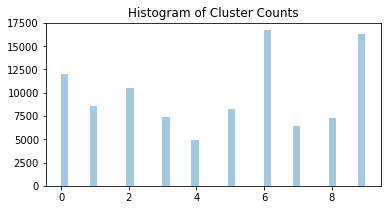

In [399]:
ax=plt.subplots(figsize=(6,3))
ax=sns.distplot(cluster_labels, kde=False)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [404]:
job_name='kmeans-2020-11-19-09-10-07-455'
model_key = "output/" + job_name + "/output/model.tar.gz"
print(model_key)

output/kmeans-2020-11-19-09-10-07-455/output/model.tar.gz


In [405]:
boto3.resource('s3').Bucket(bucket_name).download_file(model_key, 'model.tar.gz')
os.system('tar -zxvf model.tar.gz')
os.system('unzip model_algo-1')

-1

In [406]:
Kmeans_model_params = mx.ndarray.load('model_algo-1')

In [407]:
cluster_centroids=pd.DataFrame(Kmeans_model_params[0].asnumpy())
cluster_centroids.columns=trainData_df.columns
cluster_centroids

,startYear,numVotes,averageRating,isAdult,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video
0,1927.544312,17.554184,5.952841,0.000612,0.673523,0.283188,0.005082,0.024124,0.000061,0.014022
1,2007.855225,64.637581,6.504402,0.013672,0.601114,0.124959,0.031011,0.161505,0.016642,0.064770
2,2005.114014,104.322205,6.311377,0.008638,0.623346,0.105676,0.030355,0.157700,0.024531,0.058391
3,2010.503418,30.733877,6.610579,0.018676,0.538919,0.176310,0.028977,0.165576,0.013992,0.076226
4,1969.962769,14.478603,6.328691,0.055501,0.719736,0.137359,0.014343,0.079314,0.017928,0.031321
5,1953.625488,135.093262,6.185695,0.005906,0.707973,0.195341,0.014984,0.062452,0.003609,0.015640
6,1984.296631,43.552715,6.408734,0.059571,0.672815,0.102208,0.021218,0.107499,0.033817,0.062443
7,2003.597534,155.425522,6.190912,0.006528,0.649258,0.092830,0.034742,0.148042,0.018975,0.056152
8,1952.994385,68.212318,6.364516,0.005383,0.751345,0.158870,0.013522,0.062420,0.002435,0.011407
9,2007.985352,11.156151,6.712027,0.064756,0.472978,0.233218,0.039792,0.133992,0.009688,0.110333


In [408]:
newData = trainData_df.iloc[0:98300]
newData1 = trainData_df.iloc[98300:150000]
newData2 = trainData_df.iloc[150000:248300]
newData3 = trainData_df.iloc[248300:262522]
newData['labels']=list(map(int, cluster_labels))
newData1['labels']=list(map(int, cluster_labels1))
newData2['labels']=list(map(int, cluster_labels2))
newData3['labels']=list(map(int, cluster_labels3))
finalData = pd.concat([newData,newData1,newData2,newData3])
finalData

,startYear,numVotes,averageRating,isAdult,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video,labels
"Un bon bock-Animation,Short",1892,121,6.2,0,0,1,0,0,0,0,5
Chinese Opium Den-Short,1894,115,5.3,0,0,1,0,0,0,0,5
Miss Jerry-Romance,1894,156,5.9,0,1,0,0,0,0,0,7
"Opening of the Kiel Canal-News,Short",1895,54,4.5,0,0,1,0,0,0,0,6
"Arrivée d'un train gare de Vincennes-Documentary,Short",1896,135,5.3,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...
"Eco-Drama,Short",2019,9,5.4,0,0,1,0,0,0,0,2
Danielle Darrieux: Il est poli d'être gai!-Biography,2019,9,7.4,0,1,0,0,0,0,0,2
"Coven-Drama,History,Horror",2020,93,6.9,0,1,0,0,0,0,0,1
"The Secret of China-Adventure,History,War",2019,11,4.1,0,1,0,0,0,0,0,2


In [409]:
finalData.reset_index(level=0, inplace=True)
finalData = finalData.rename(columns={'index': 'Title'})
finalData

,Title,startYear,numVotes,averageRating,isAdult,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video,labels
0,"Un bon bock-Animation,Short",1892,121,6.2,0,0,1,0,0,0,0,5
1,Chinese Opium Den-Short,1894,115,5.3,0,0,1,0,0,0,0,5
2,Miss Jerry-Romance,1894,156,5.9,0,1,0,0,0,0,0,7
3,"Opening of the Kiel Canal-News,Short",1895,54,4.5,0,0,1,0,0,0,0,6
4,Arrivée d'un train gare de Vincennes-Documenta...,1896,135,5.3,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
262517,"Eco-Drama,Short",2019,9,5.4,0,0,1,0,0,0,0,2
262518,Danielle Darrieux: Il est poli d'être gai!-Bio...,2019,9,7.4,0,1,0,0,0,0,0,2
262519,"Coven-Drama,History,Horror",2020,93,6.9,0,1,0,0,0,0,0,1
262520,"The Secret of China-Adventure,History,War",2019,11,4.1,0,1,0,0,0,0,0,2


In [442]:
new = finalData["Title"].str.split("-", n = 1, expand = True)
finalData

,Title,startYear,numVotes,averageRating,isAdult,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video,labels
0,"Un bon bock-Animation,Short",1892,121,6.2,0,0,1,0,0,0,0,5
1,Chinese Opium Den-Short,1894,115,5.3,0,0,1,0,0,0,0,5
2,Miss Jerry-Romance,1894,156,5.9,0,1,0,0,0,0,0,7
3,"Opening of the Kiel Canal-News,Short",1895,54,4.5,0,0,1,0,0,0,0,6
4,Arrivée d'un train gare de Vincennes-Documenta...,1896,135,5.3,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
262517,"Eco-Drama,Short",2019,9,5.4,0,0,1,0,0,0,0,2
262518,Danielle Darrieux: Il est poli d'être gai!-Bio...,2019,9,7.4,0,1,0,0,0,0,0,2
262519,"Coven-Drama,History,Horror",2020,93,6.9,0,1,0,0,0,0,0,1
262520,"The Secret of China-Adventure,History,War",2019,11,4.1,0,1,0,0,0,0,0,2


In [443]:
conclude_df = pd.merge(finalData, new,right_index=True,left_index=True)
conclude_df

,Title,startYear,numVotes,averageRating,isAdult,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvSeries,titleType_tvSpecial,titleType_video,labels,0,1
0,"Un bon bock-Animation,Short",1892,121,6.2,0,0,1,0,0,0,0,5,Un bon bock,"Animation,Short"
1,Chinese Opium Den-Short,1894,115,5.3,0,0,1,0,0,0,0,5,Chinese Opium Den,Short
2,Miss Jerry-Romance,1894,156,5.9,0,1,0,0,0,0,0,7,Miss Jerry,Romance
3,"Opening of the Kiel Canal-News,Short",1895,54,4.5,0,0,1,0,0,0,0,6,Opening of the Kiel Canal,"News,Short"
4,Arrivée d'un train gare de Vincennes-Documenta...,1896,135,5.3,0,0,1,0,0,0,0,5,Arrivée d'un train gare de Vincennes,"Documentary,Short"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262517,"Eco-Drama,Short",2019,9,5.4,0,0,1,0,0,0,0,2,Eco,"Drama,Short"
262518,Danielle Darrieux: Il est poli d'être gai!-Bio...,2019,9,7.4,0,1,0,0,0,0,0,2,Danielle Darrieux: Il est poli d'être gai!,Biography
262519,"Coven-Drama,History,Horror",2020,93,6.9,0,1,0,0,0,0,0,1,Coven,"Drama,History,Horror"
262520,"The Secret of China-Adventure,History,War",2019,11,4.1,0,1,0,0,0,0,0,2,The Secret of China,"Adventure,History,War"


In [412]:
conclude_df = conclude_df.drop(['Title','titleType_movie','titleType_short','titleType_tvEpisode','titleType_tvSeries','titleType_tvSpecial','titleType_video'],axis=1)
conclude_df

,startYear,numVotes,averageRating,isAdult,labels,0,1
0,1892,121,6.2,0,5,Un bon bock,"Animation,Short"
1,1894,115,5.3,0,5,Chinese Opium Den,Short
2,1894,156,5.9,0,7,Miss Jerry,Romance
3,1895,54,4.5,0,6,Opening of the Kiel Canal,"News,Short"
4,1896,135,5.3,0,5,Arrivée d'un train gare de Vincennes,"Documentary,Short"
...,...,...,...,...,...,...,...
262517,2019,9,5.4,0,2,Eco,"Drama,Short"
262518,2019,9,7.4,0,2,Danielle Darrieux: Il est poli d'être gai!,Biography
262519,2020,93,6.9,0,1,Coven,"Drama,History,Horror"
262520,2019,11,4.1,0,2,The Secret of China,"Adventure,History,War"


In [413]:
conclude_df = conclude_df.rename(columns={0: 'Title'})
conclude_df = conclude_df.rename(columns={1:'titleType'})

In [414]:
conclude_df = conclude_df[['Title', 'titleType','startYear','numVotes', 'averageRating','isAdult','labels' ]]
conclude_df.head()

,Title,titleType,startYear,numVotes,averageRating,isAdult,labels
0,Un bon bock,"Animation,Short",1892,121,6.2,0,5
1,Chinese Opium Den,Short,1894,115,5.3,0,5
2,Miss Jerry,Romance,1894,156,5.9,0,7
3,Opening of the Kiel Canal,"News,Short",1895,54,4.5,0,6
4,Arrivée d'un train gare de Vincennes,"Documentary,Short",1896,135,5.3,0,5


In [415]:
cluster=conclude_df[conclude_df['labels']==0]
cluster

,Title,titleType,startYear,numVotes,averageRating,isAdult,labels
121,Cinderella,Musical,1961,48,7.6,0,0
122,Cinderella,Musical,1961,48,7.6,0,0
123,Cinderella,Musical,1961,48,7.6,0,0
124,Cinderella,Musical,1961,48,7.6,0,0
125,Cinderella,Musical,1961,48,7.6,0,0
...,...,...,...,...,...,...,...
258162,Ik hou het wel voor gezien,"Documentary,Short",1973,74,8.0,0,0
259837,The Midnight Parasites,"Animation,Fantasy,Horror",1972,59,7.0,0,0
260311,Amor de Perdição,Drama,1979,35,7.7,0,0
261580,Al Shaqa Mn Haq Al Zawjah,Comedy,1985,37,6.4,0,0


In [416]:
print(kmeans_predictor.endpoint_name)

kmeans-2020-11-19-09-14-40-936


In [417]:
import sagemaker

sagemaker.Session().delete_endpoint(kmeans_predictor.endpoint_name)


# Suggest Movies 

In [418]:
conclude_df['Title'] = conclude_df['Title'].astype('string')

In [419]:
conclude_df.dtypes

Title              string
titleType          object
startYear        category
numVotes            int64
averageRating     float64
isAdult             uint8
labels              int64
dtype: object

In [420]:
watchedMovie = input("Please enter the title of the movie you just watched : ")

Please enter the title of the movie you just watched : Watering the Flowers


In [421]:
print(watchedMovie)

Watering the Flowers


In [436]:
#fullmatch attribute does not exist for StringMetthods object
if conclude_df['Title'].str.match(watchedMovie).any():
    watcheddf = conclude_df[conclude_df['Title'].str.contains(watchedMovie)==True]
    index=watcheddf.index.values.astype(int)[0]
    labelvalue = conclude_df['labels'].values[index]
    newdf = conclude_df[conclude_df['labels']==labelvalue]

    print("You finished watching: " + watchedMovie + ".")
    print("Try one of these titles next.")
    print("\n")
    
    list_of_movies = newdf['Title'].to_list()   
    i = 0
    while i<11:   

        if watchedMovie == list_of_movies[i]:
            
            i+=1
        else:
            print(list_of_movies[i])
            i+=1

else:
    print('Sorry, we can not suggest other movies based on the movie title you just entered!')

You finished watching: Watering the Flowers.
Try one of these titles next.


Un bon bock
Chinese Opium Den
Arrivée d'un train gare de Vincennes
Carga de rurales
Saída do Pessoal Operário da Fábrica Confiança
Conjuring
The Devil's Laboratory
Výstavní párkar a lepic plakátù
Cinderella
Cinderella


In [444]:
conclude_df.iloc[259766]

Title                  The Office Mix-Up-Comedy,Romance
startYear                                          2020
numVotes                                             76
averageRating                                       5.2
isAdult                                               0
titleType_movie                                       1
titleType_short                                       0
titleType_tvEpisode                                   0
titleType_tvSeries                                    0
titleType_tvSpecial                                   0
titleType_video                                       0
labels                                                3
0                                        The Office Mix
1                                     Up-Comedy,Romance
Name: 259766, dtype: object